**Q2.Backpropagation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from operator import add
from scipy.special import expit
import math
from tqdm import tqdm
import pickle as pk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier

Implementing neural networl algorithm

In [ ]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        self.layer_sizes=layer_sizes[1:]
        self.n_layers=len(self.layer_sizes)
        self.activation=activation
        self.learning_rate=learning_rate
        self.weight_init=weight_init
        self.batch_size=batch_size
        self.num_epochs=num_epochs
        self.n_samples=0
        self.W={}
        self.loss_training=[]
        self.loss_val=[]

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass



       






    

    #Activation Functions
    def relu(self, X):    #Relu
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.maximum(0,X)

    def relu_grad(self, X):   #Relu gradient
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X[X<=0]=0
        X[X>0]=1
        return X


    def sigmoid(self, X):   #Sigmoid
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1.0/(1.0+np.exp(-X))

    def sigmoid_grad(self, X):     #Gradient of sigmoid function
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        var=self.sigmoid(X)
        return var*(1-var)

    def linear(self, X):           #linear activation function
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return X

    def linear_grad(self, X):              #Gradient  of linear activation function
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X[X<=0]=1
        X[X>0]=1
        return X

    def tanh(self, X):     #Tanh
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.tanh(X)

    def tanh_grad(self, X):      #gradient of tanh activation function
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1-np.power(self.tanh(X),2)

    def softmax(self, X):         #Softmax
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        expX=np.exp(X-np.max(X))
        return expX/expX.sum(axis=0,keepdims=True)
        

    def softmax_grad(self, X):    #softmax gradient
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        s = X.reshape(-1,1)
        return np.diagflat(X)-np.dot(s,np.transpose(s))
        # weight initialization techniques for the hidde layers

    def zero_init(self, shape):  #Zero initialization
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.zeros((shape[0],shape[1]))

    def random_init(self, shape):  #Random initialization with a scaling factor of 0.01
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.random.randn(shape[0],shape[1])*0.01

    def normal_init(self, shape):   #Normal(0,1) initialization with a scaling factor of 0.01
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.random.normal(size=(shape[0],shape[1]))*0.01

    #Weight initialization for layers

    def weight_i(self):
        np.random.seed(30)
        for i in range(1,len(self.layer_sizes)):
            a=self.layer_sizes[i]
            z=self.layer_sizes[i-1]
            if self.weight_init=="normal":
              self.W["Weights"+str(i)]=self.normal_init((a,z))
              self.W["Bias"+str(i)]=self.zero_init((a,1))

            elif self.weight_init=="random":
              self.W["Weights"+str(i)]=self.random_init((a,z))
              self.W["Bias"+str(i)]=self.zero_init((z,1))

            elif self.weight_init=="zero":
              self.W["Weights"+str(i)]=self.zero_init((a,z))
              self.W["Bias"+str(i)]=self.zero_init((a,1))



    def activation_i(self,i):  #  activation functions for layers
      if self.activation=="relu":
        output=self.relu(i)
      elif self.activation=="sigmoid":
        output=self.sigmoid(i)
      elif self.activation=="linear":
        output=self.linear(i)
      elif self.activation=="tanh":
        output=self.tanh(i)
      elif self.activation=="sigmoid":
        output=self.sigmoid(i)
      
      return output



    # forward pass

    def forward_pass(self,X):
      output=np.transpose(X)
      
      D={} ## weights,inputs and outputs storing for layers 
      for l in range(self.n_layers-1):
          
          i=self.W["Weights"+str(l+1)].dot(output)+self.W["Bias"+str(l+1)] #first layer 
          
          
          output = self.activation_i(i)  #output for first layer, hidden layer

          D["i"+str(l+1)]=i
          D["Weights"+str(l+1)]=self.W["Weights"+str(l+1)]
          D["output"+str(l+1)]=output
      
       
      i=self.W["Weights"+str(self.n_layers)].dot(output)
      i=i+self.W["Bias"+str(self.n_layers)]

      
      output=self.softmax(i)   #softmax for the last layer

      D["i"+str(self.n_layers)]=i
      D["output"+str(self.n_layers)]=output
      D["Weights"+str(self.n_layers)]=self.W["Weights"+str(self.n_layers)]

      return output,D


     #Backpropagation

    def Backward_prop(self, X, Y, D):
        
        Layers = self.n_layers
        Gradient={}
        D["output0"]=np.transpose(X)
        output=D["output"+str(Layers)]

        #calculating derivative term at final layer
        Di=output-np.transpose(Y)
        Db=np.sum(Di,axis=1,keepdims=True)/self.batch_size

        Dw=Di.dot(np.transpose(D["output"+str(Layers-1)]))
        Dw=Dw/self.batch_size

        Wi=np.transpose(D["Weights"+str(Layers)])
        Wi=Wi.dot(Di)
        Gradient["Dw"+str(Layers)]=Dw
        Gradient["Db"+str(Layers)]=Db
 
        
        for i in range(Layers-1,0,-1):
            input_i = "i"+str(i)
            output_i = "output"+str(i)
            
            if self.activation=="relu":  #gradient of activation
              derv=self.relu_grad(D[input_i])
            elif self.activation=="sigmoid":
              derv=self.sigmoid_grad(D[input_i])
            elif self.activation=="linear":
              derv=self.linear_grad(D[input_i])
            elif self.activation=="tanh":
              derv=self.tanh_grad(D[input_i])
            elif self.activation=="softmax":
              derv=self.softmax_grad(D[input_i])

            Di=np.multiply(Wi,derv)
            Db=np.sum(Di,axis=1,keepdims=True)/self.batch_size
            value=np.transpose(D["output"+str(i-1)])
            Dw=Di.dot(value)
            Dw=Dw/self.batch_size
            
            if i>=2:
                Wi=np.transpose(D["Weights"+str(i)])
                Wi=Wi.dot(Di)

            #storing change in weights
            Gradient["Db"+str(i)]=Db
            Gradient["Dw"+str(i)]=Dw

        return Gradient



    
    
    def weight_u(self, Gradient):   #weight update 
      for j in range(1,self.n_layers+1):
        self.W["Weights"+str(j)]-=np.multiply(self.learning_rate,Gradient["Dw"+str(j)])
        self.W["Bias"+str(j)]-=np.multiply(self.learning_rate,Gradient["Db"+str(j)])

    
    def val_intializ(self , x, y):
      self.x_val = x
      self.y_val= y

    def fit(self, X, Y, x,y):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        Returns
        -------
        self : an instance of self
        """

        
        np.random.seed(40)
        self.val_intializ(x,y)
        self.n_samples=X.shape[0]
        self.layer_sizes.insert(0,X.shape[1])
        
        self.weight_i()   #weight
        Epoch=self.num_epochs//5

      
        for i in range(self.num_epochs):
            
            X,Y=shuffle(X,Y,random_state=i) #creating batches
            e
            num_batches=X.shape[0]//self.batch_size
            Train_X=np.vsplit(X,num_batches)
            Train_Y=np.vsplit(Y,num_batches)
            cost=0
            
           
            for i in range(num_batches):
              #forward propagation
              Z,d=self.forward_pass(Train_X[i])
             
              loss = self.cross_entropy_loss(Z,Train_Y[i])/num_batches #cross entropy loss
              cost = cost+loss
              Gradient=self.Backward_prop(Train_X[i],Train_Y[i],d)

              self.weight_u(Gradient)
              
            if i%Epoch==0:
                print("Training accuracy score :",self.score(X,Y))
            
           
            
            self.loss_training.append(cost)   #storing validation and training loss
            prob = self.predict_proba(self.x_val)
            cost_val = self.cross_entropy_loss(prob,self.y_val)
            self.loss_val.append(cost_val)
        return self
        return self

    def cross_entropy_loss(self, Z, y):
      Loss = (-np.mean(np.multiply(y,np.log(np.transpose(Z)))))
      return Loss
    

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """

        # return the numpy array y which contains the predicted values
        Prob,cache=self.forward_pass(X)
        return Prob


        

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """

        # return the numpy array y which contains the predicted values
        Prob=self.predict_proba(X)
        Y_Pred=np.argmax(Prob,axis=0)
        return Y_Pred
        
    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """
        Y_Pred=self.predict(X)
        y=np.argmax(y,axis=1)
        return (Y_Pred==y).mean()
    def LOSS(self):
      len(self.loss_training)
      len(self.loss_val)

    # plotting training loss vs epoch and validation loss vs epoch
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.loss_training)),self.loss_training, 'g-', label='Training Loss vs epoch')
        plt.plot(np.arange(len(self.loss_val)),self.loss_val, 'b-', label='Validation Loss vs epoch')
        plt.xlabel("Epochs")
        plt.ylabel("Loss ")
        plt.legend()
        plt.show()
    def compare_with_mlp(self,X,y):
        

        mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation ='relu',solver = 'sgd' , alpha = 0, batch_size = 32,max_iter=100, learning_rate_init = 0.001, learning_rate = 'constant',shuffle=True,momentum = 0,nesterovs_momentum=False,validation_fraction = 0.1)

        mlp.fit(X, y)

        loss_from_sklearn = mlp.loss_curve_

        plt.plot(loss_from_sklearn,label="sklearn")
        plt.plot(np.arange(len(self.loss_training)),self.loss_training,label="your NN")
        plt.legend(loc="upper left")
        plt.savefig("result.png")
        plt.close()

#Loading MNIST Fashion data

In [ ]:
Data=pd.read_csv('/content/drive/MyDrive/fashion-mnist_train (1).csv')


In [ ]:
Data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X,y = Data.drop(['label'], axis = 1), Data['label']


In [ ]:
Data.shape


(60000, 785)

In [ ]:
X.shape


(60000, 784)

Splitting the data in 80% train,10% validation and 10% testing

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x, X_Test, Y, Y_Test = train_test_split(X, y, test_size = 0.1, random_state = 5)


In [ ]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(x, Y, test_size = 0.1, random_state = 5)


In [ ]:
X_Train.shape, Y_Train.shape


((48600, 784), (48600,))

In [ ]:
X_Train=X_Train.to_numpy()


In [ ]:
Y_Train= Y_Train.to_numpy()


In [ ]:
X_Test=X_Test.to_numpy()


In [ ]:
Y_Test=Y_Test.to_numpy()


In [ ]:
X_Val.shape, Y_Val.shape


((5400, 784), (5400,))

In [ ]:
X_Val=X_Val.to_numpy()


In [ ]:
Y_Val= Y_Val.to_numpy()

 Scaling data using StandardScaler

In [ ]:

scaler=StandardScaler()
X_Train=scaler.fit_transform(X_Train)
X_Test=scaler.transform(X_Test)
X_Val=scaler.transform(X_Val)



Hot encoding

In [ ]:

encoder=OneHotEncoder(sparse=False,categories='auto')
Y_Train = encoder.fit_transform(Y_Train.reshape(len(Y_Train),-1))
Y_Test = encoder.transform(Y_Test.reshape(len(Y_Test),-1))
Y_Val = encoder.transform(Y_Val.reshape(len(Y_Val),-1))


RelU activation function, 100 iteration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:438: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:438: RuntimeWarning: invalid value encountered in multiply


ReLU activation function
Training Accuracy: 0.9870164609053498
Testing Accuracy: 0.8865


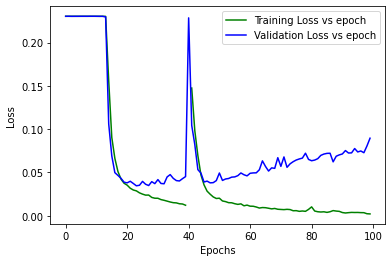

In [ ]:

nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"relu",0.1,"normal",100,100)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('ReLU activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()


In [ ]:

# save the weights and Bias to disk
filename = '100itr_ReLU_Wights_Bias.sav'
pickle.dump(nn.W, open(filename, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias = pickle.load(open(filename, 'rb'))


In [ ]:
loaded_weights_bias

{'Bias1': array([[-0.47218709],
        [-0.33937144],
        [-0.10558451],
        [-0.34157562],
        [-0.19512515],
        [-0.28030882],
        [-0.43061945],
        [-0.26392988],
        [-0.29815605],
        [-0.45148632],
        [-0.23795964],
        [-0.27241401],
        [-0.35915004],
        [-0.22615376],
        [-0.26728175],
        [-0.50426818],
        [-0.16383962],
        [-0.27587017],
        [-0.31561909],
        [-0.19899325],
        [-0.25857414],
        [-0.18216454],
        [-0.39919205],
        [-0.21432716],
        [-0.32269338],
        [-0.23969577],
        [-0.23648211],
        [-0.30114785],
        [-0.26652116],
        [-0.22914418],
        [-0.45511078],
        [-0.21294114],
        [-0.57331838],
        [-0.19043625],
        [-0.24907058],
        [-0.15948036],
        [-0.2197878 ],
        [-0.38832294],
        [-0.45790488],
        [-0.23706229],
        [-0.29731657],
        [-0.42668461],
        [-0.18726051],
  

Sigmoid activation function, 100 iteration

Sigmoid activation function
Training Accuracy: 0.09958847736625515
Testing Accuracy: 0.10116666666666667


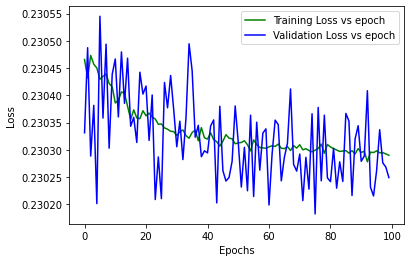

In [ ]:

nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"sigmoid",0.1,"normal",100,100)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('Sigmoid activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()

In [ ]:

# save the weights and Bias to disk
filename1 = '100itr_Sigmoid_Wights_Bias.sav'
pickle.dump(nn.W, open(filename1, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_Sigmoid = pickle.load(open(filename1, 'rb'))
loaded_weights_bias_Sigmoid 


{'Bias1': array([[ 1.40811489e-05],
        [ 4.41443134e-05],
        [ 3.54217895e-05],
        [ 2.68339070e-05],
        [ 2.43219260e-05],
        [ 3.19846234e-05],
        [-5.57665827e-05],
        [ 2.03802140e-06],
        [ 2.46254359e-05],
        [-5.02809821e-07],
        [-1.37984015e-05],
        [ 2.72052678e-05],
        [ 3.56206284e-05],
        [ 2.91917872e-05],
        [ 4.60393273e-05],
        [ 2.48282437e-06],
        [ 4.43949153e-05],
        [ 6.24313428e-05],
        [ 1.85240571e-05],
        [-8.11999902e-06],
        [ 7.78497016e-05],
        [ 1.88467758e-05],
        [ 2.09987810e-05],
        [ 1.57647997e-05],
        [ 4.80500129e-05],
        [ 1.89922471e-05],
        [ 1.54187059e-05],
        [-1.41706473e-05],
        [ 3.60802254e-05],
        [-1.77248000e-05],
        [ 2.12524093e-05],
        [ 6.11422171e-05],
        [ 1.88582501e-05],
        [-9.49768790e-07],
        [-9.94503810e-06],
        [-4.33253186e-06],
        [ 1.7902608

linear activation function, 100 iteration

For relu activation function
Training Accuracy: 0.8377777777777777
Testing Accuracy: 0.8171666666666667


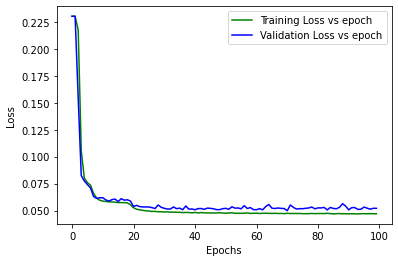

{'Bias1': array([[ 3.21770894e-02],
        [ 6.89231110e-03],
        [-7.63499746e-02],
        [-6.22646634e-02],
        [ 6.37706008e-02],
        [ 4.67656746e-02],
        [ 4.04096673e-02],
        [-3.29668053e-02],
        [-1.19459826e-01],
        [ 6.93802088e-02],
        [-5.16918389e-02],
        [-3.01226274e-02],
        [-1.25477768e-01],
        [ 2.72807142e-03],
        [-3.27559892e-02],
        [ 1.22987345e-01],
        [ 7.97234566e-02],
        [ 1.43216964e-01],
        [-8.39105729e-03],
        [-1.70580954e-02],
        [-6.23328997e-02],
        [ 1.04018904e-01],
        [ 1.24065069e-02],
        [ 4.82884233e-02],
        [-2.90302303e-02],
        [-7.81319499e-02],
        [ 3.75779118e-02],
        [ 1.46493668e-02],
        [-1.46177274e-02],
        [ 3.13029216e-02],
        [ 2.46269724e-02],
        [ 1.30842717e-01],
        [-2.16627810e-02],
        [-8.82753273e-03],
        [-3.22000906e-04],
        [-4.23514477e-02],
        [ 6.8483292

In [ ]:

nn=MyNeuralNetwork(6,[784,256,128,64,32,10],"linear",0.1,"normal",100,100)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('Linear activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()
# save the weights and Bias to disk
filename2 = '100itr_Linear_Wights_Bias.sav'
pickle.dump(nn.W, open(filename2, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_Linear = pickle.load(open(filename2, 'rb'))
loaded_weights_bias_Linear

Tanh activation function, 100 iteration

Tanh activation function
Training Accuracy: 0.9985802469135803
Testing Accuracy: 0.8821666666666667


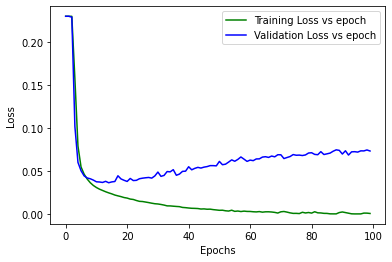

{'Bias1': array([[-3.02731496e-02],
        [ 3.36819522e-03],
        [ 6.40053864e-04],
        [-1.10581180e-01],
        [-1.79760519e-02],
        [-2.34694852e-03],
        [-3.63601653e-03],
        [-1.99917584e-02],
        [ 3.56375767e-03],
        [-1.50863383e-02],
        [-4.42796981e-02],
        [ 1.29659377e-01],
        [-1.46866468e-01],
        [-6.07748549e-02],
        [ 2.76083801e-02],
        [-8.78565322e-03],
        [-2.57956583e-01],
        [ 9.49555782e-02],
        [-9.78724130e-03],
        [-7.89238073e-02],
        [-1.29908271e-02],
        [ 9.37351084e-03],
        [-5.88048091e-02],
        [-1.20444510e-01],
        [ 2.12940203e-01],
        [ 6.71095608e-02],
        [ 1.77754225e-01],
        [ 2.07705718e-02],
        [ 1.44047968e-02],
        [ 3.27669098e-02],
        [-1.63698741e-02],
        [ 1.26556807e-01],
        [-2.51653063e-02],
        [ 2.15097084e-02],
        [ 5.95688206e-03],
        [-2.49488001e-02],
        [-6.9516741

In [ ]:
#for tanh
nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"tanh",0.1,"normal",100,100)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('Tanh activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()
# save the weights and Bias to disk
filename3 = '100itr_tanh_Wights_Bias.sav'
pickle.dump(nn.W, open(filename3, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_tanh = pickle.load(open(filename3, 'rb'))
loaded_weights_bias_tanh

ReLU activation function, 50 iteration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:438: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:438: RuntimeWarning: invalid value encountered in multiply


ReLU activation function
Training Accuracy: 0.935164609053498
Testing Accuracy: 0.8833333333333333


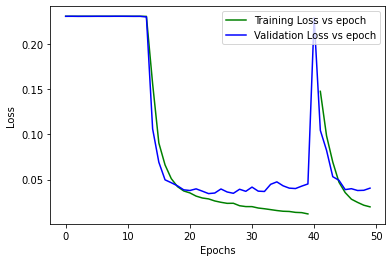

{'Bias1': array([[-0.28516579],
        [-0.16935312],
        [-0.13072157],
        [-0.25221062],
        [-0.09952965],
        [-0.14642063],
        [-0.28687614],
        [-0.17305475],
        [-0.1804818 ],
        [-0.33516638],
        [-0.15893454],
        [-0.18924214],
        [-0.25333662],
        [-0.20174594],
        [-0.12908428],
        [-0.36037738],
        [-0.09821476],
        [-0.17259798],
        [-0.21122929],
        [-0.10292058],
        [-0.15119305],
        [-0.11541885],
        [-0.28974951],
        [-0.08836216],
        [-0.20567945],
        [-0.14054113],
        [-0.15711278],
        [-0.21025742],
        [-0.17941187],
        [-0.11943852],
        [-0.39553514],
        [-0.16189725],
        [-0.49353768],
        [-0.14532868],
        [-0.12712493],
        [-0.07665284],
        [-0.10906327],
        [-0.25713809],
        [-0.30286853],
        [-0.13572332],
        [-0.20273611],
        [-0.31773777],
        [-0.14188831],
  

In [ ]:

nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"relu",0.1,"normal",100,50)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('ReLU activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()

# save the weights and Bias to disk
filename4 = '50itr_ReLU_Wights_Bias.sav'
pickle.dump(nn.W, open(filename4, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_Relu_50 = pickle.load(open(filename4, 'rb'))
loaded_weights_bias_Relu_50 


Sigmoid activation function, 50 iteration

ReLU activation function
Training Accuracy: 0.09983539094650205
Testing Accuracy: 0.1085


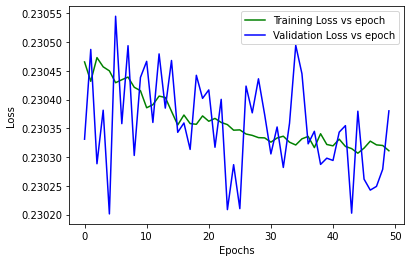

{'Bias1': array([[ 6.57712767e-06],
        [ 1.24514169e-05],
        [ 1.54348002e-05],
        [ 9.43568780e-06],
        [ 9.92798385e-06],
        [ 8.92414245e-06],
        [-2.33059050e-05],
        [-2.07854673e-06],
        [ 1.07760117e-05],
        [-4.79174612e-06],
        [-8.27064625e-06],
        [ 1.48110396e-05],
        [ 1.14421571e-05],
        [ 1.24048357e-05],
        [ 1.97837055e-05],
        [-2.88977578e-06],
        [ 1.32098628e-05],
        [ 2.56307583e-05],
        [ 7.47235345e-06],
        [-3.82592645e-06],
        [ 4.08686388e-05],
        [ 6.95351976e-06],
        [ 5.84698938e-06],
        [ 6.98500839e-06],
        [ 1.75891713e-05],
        [ 4.64190358e-06],
        [ 1.34046636e-06],
        [-8.04177763e-06],
        [ 1.02031474e-05],
        [-1.15646320e-05],
        [ 8.15904244e-06],
        [ 1.97230754e-05],
        [ 9.73890061e-06],
        [-3.28955310e-06],
        [-9.22138042e-06],
        [-4.25907241e-06],
        [-3.0750174

In [ ]:

nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"sigmoid",0.1,"normal",100,50)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('ReLU activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()

# save the weights and Bias to disk
filename5 = '50itr_Sigmoid_Wights_Bias.sav'
pickle.dump(nn.W, open(filename5, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_Sigmoid_50 = pickle.load(open(filename5, 'rb'))
loaded_weights_bias_Sigmoid_50 

Linear activation function, 50 iteration

ReLU activation function
Training Accuracy: 0.8383333333333334
Testing Accuracy: 0.8218333333333333


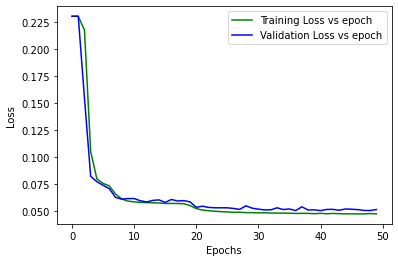

{'Bias1': array([[ 0.01523168],
        [ 0.0048179 ],
        [-0.05554445],
        [-0.05447427],
        [ 0.04160401],
        [ 0.03179722],
        [ 0.02500042],
        [-0.02064328],
        [-0.0819452 ],
        [ 0.05396965],
        [-0.03238192],
        [-0.02788557],
        [-0.08681565],
        [ 0.00329794],
        [-0.03573254],
        [ 0.07643192],
        [ 0.06699058],
        [ 0.10291775],
        [-0.00389962],
        [-0.01082772],
        [-0.03395713],
        [ 0.07140813],
        [ 0.01289662],
        [ 0.0331163 ],
        [-0.00737454],
        [-0.0458282 ],
        [ 0.03365249],
        [ 0.00631335],
        [-0.01401232],
        [ 0.0239517 ],
        [ 0.00920209],
        [ 0.09828207],
        [-0.01261778],
        [-0.00490198],
        [-0.00148606],
        [-0.03139544],
        [ 0.04527223],
        [ 0.10041013],
        [-0.02166217],
        [ 0.05042881],
        [-0.07444372],
        [ 0.1007017 ],
        [-0.00688915],
  

In [ ]:
nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"linear",0.1,"normal",100,50)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('ReLU activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()

# save the weights and Bias to disk
filename6 = '50itr_linear_Wights_Bias.sav'
pickle.dump(nn.W, open(filename6, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_linear_50 = pickle.load(open(filename6, 'rb'))
loaded_weights_bias_linear_50 

tanh activation function, 50 iteration

ReLU activation function
Training Accuracy: 0.9863168724279835
Testing Accuracy: 0.881


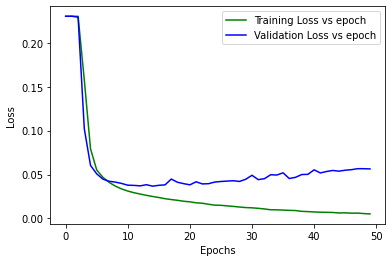

{'Bias1': array([[-2.80560993e-02],
        [ 3.73576374e-03],
        [ 2.24542760e-02],
        [-1.00816582e-01],
        [-1.72626536e-02],
        [ 1.67212017e-03],
        [-8.98884241e-03],
        [-2.10785461e-02],
        [-1.62045555e-02],
        [ 6.33572782e-04],
        [-3.11156567e-02],
        [ 9.92252192e-02],
        [-1.25962809e-01],
        [-4.94627185e-02],
        [ 2.78864695e-02],
        [-2.82496897e-03],
        [-2.19804172e-01],
        [ 7.98547505e-02],
        [-5.29667187e-03],
        [-5.79209209e-02],
        [-9.39465164e-03],
        [ 7.24292463e-03],
        [-2.38076558e-02],
        [-8.45965518e-02],
        [ 1.64935318e-01],
        [ 6.44632388e-02],
        [ 1.29562304e-01],
        [ 1.62087582e-02],
        [ 8.82384622e-03],
        [ 2.98656514e-02],
        [-2.14420104e-02],
        [ 1.28983572e-01],
        [-2.94993688e-02],
        [ 1.56413187e-02],
        [-7.54456493e-03],
        [-7.53982690e-03],
        [-5.7792508

In [ ]:
nn=MyNeuralNetwork(10,[784,256,128,64,32,10],"tanh",0.1,"normal",100,50)
nn.fit(X_Train,Y_Train,X_Val,Y_Val)
print('ReLU activation function')
print("Training Accuracy:",nn.score(X_Train,Y_Train))
print("Testing Accuracy:",nn.score(X_Test,Y_Test))
nn.plot_cost()

# save the weights and Bias to disk
filename7 = '50itr_tanh_Wights_Bias.sav'
pickle.dump(nn.W, open(filename7, 'wb'))
 

 
# load the  wights and bias from disk
loaded_weights_bias_tanh_50 = pickle.load(open(filename7, 'rb'))
loaded_weights_bias_tanh_50 

**MLP Classifier**

MLP Classifier using ReLU 100 iteration

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", batch_size=50, learning_rate_init=0.08, max_iter=100, random_state=123, solver="sgd")
clf.fit(X_Train, Y_Train)
print(clf.score(X_Test, Y_Test))


0.0


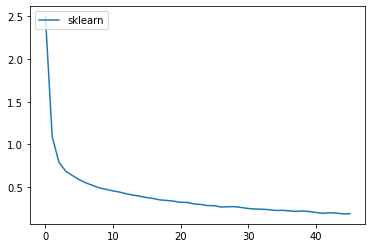

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()



MLP Classifier using sigmoid 100 iteration

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="logistic", batch_size=50, learning_rate_init=0.08, max_iter=100, random_state=123, solver="sgd")
clf.fit(X_Train, Y_Train)
print(clf.score(X_Test, Y_Test))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.874


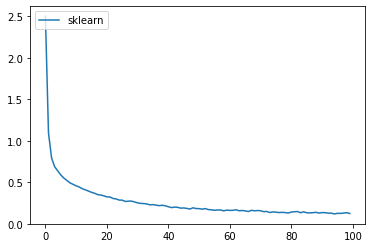

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()


MLP Classifier using linear 50 iterations

In [ ]:
#MLP Classifier using linear
clf1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="identity", batch_size=200, learning_rate_init=0.08, max_iter=50, random_state=123,solver="sgd")
clf1.fit(X_Train, Y_Train)
print(clf1.score(X_Test, Y_Test))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


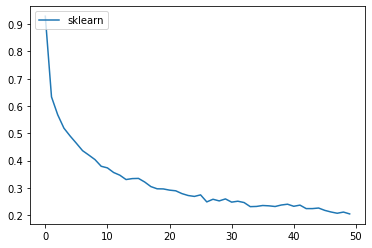

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()

MLP Classifier using tanh 50 iteration

In [ ]:
#MLP Classifier using tanh
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="tanh", batch_size=200, learning_rate_init=0.08, max_iter=50, random_state=123, solver="sgd")
clf.fit(X_Train, Y_Train)
print(clf.score(X_Test, Y_Test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8731666666666666


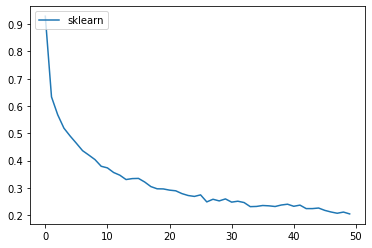

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()

MLP Classifier using Sigmoid 50 iteration

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="logistic", batch_size=50, learning_rate_init=0.08, max_iter=50, random_state=123, solver="sgd")
clf.fit(X_Train, Y_Train)
print(clf.score(X_Test, Y_Test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.878


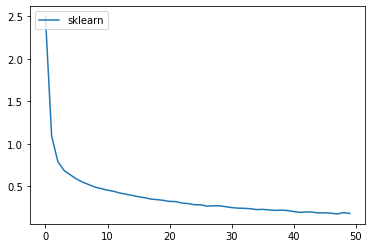

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()

MLP Classifier using ReLU 50 iteration

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", batch_size=50, learning_rate_init=0.08, max_iter=50, random_state=123, solver="sgd")
clf.fit(X_Train, Y_Train)
print(clf.score(X_Test, Y_Test))

0.0


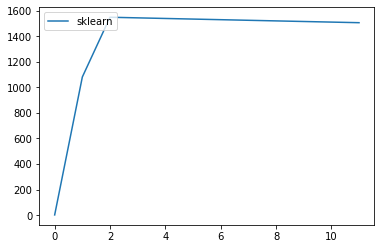

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()

MLP Classifier using linear 100 iteration

In [ ]:
#MLP Classifier using linear
clf1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="identity", batch_size=200, learning_rate_init=0.08, max_iter=100, random_state=123,solver="sgd")
clf1.fit(X_Train, Y_Train)
print(clf1.score(X_Test, Y_Test))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


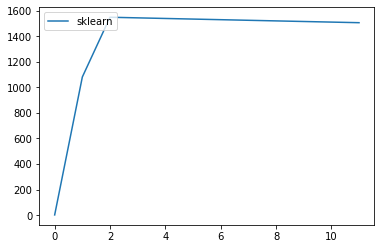

In [ ]:
loss_from_sklearn = clf.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()

MLP Classifier using tanh 100 iteration

In [31]:
#MLP Classifier using tanh
clf1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="tanh", batch_size=200, learning_rate_init=0.08, max_iter=100, random_state=123,solver="sgd")
clf1.fit(X_Train, Y_Train)
print(clf1.score(X_Test, Y_Test))

0.8743333333333333


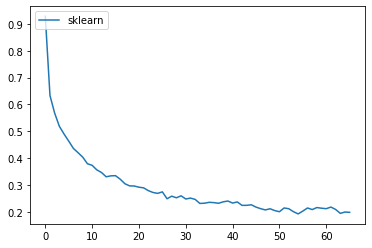

In [32]:
loss_from_sklearn = clf1.loss_curve_

plt.plot(loss_from_sklearn,label="sklearn")
      
plt.legend(loc="upper left")
plt.savefig("result.png")
plt.show()